### 12 Jan 2023

## Fig. 2 code. 

In [1]:
# # load packages
from glob import glob
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC
import cmocean
import scipy
from scipy import ndimage
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

/opt/anaconda3/envs/sealenv/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## First plot thermal imagery

### 1. Read in MODIS 2 June 2020

In [2]:
# JUNE 2 2020
# Make list of all MOD09 files in folder
MODfiles = glob('../MODIS/2020/MOD09.A2020154.1410.006.2020156021206.hdf')

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)
B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

### Plot

/opt/anaconda3/envs/sealenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


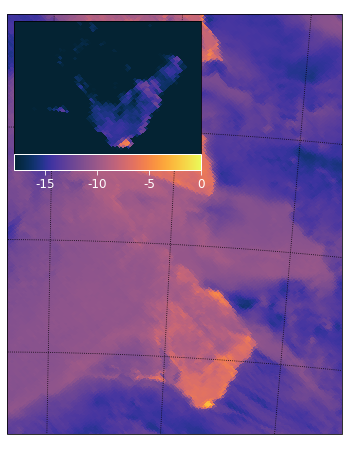

In [3]:
llcrnrlat=-75.3;urcrnrlat=-73.5;llcrnrlon=-104.7;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(6,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels= False


data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-40,vmax=0,zorder=1)#vmin=-5.0,vmax=-2.5,

# inset
axins = inset_axes(ax, width="50%", height="50%", loc='upper left', 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.SouthPolarStereo(central_longitude=-105.0)))

ip = InsetPosition(ax,[0.02, 0.535, 0.56, 0.56])
axins.set_axes_locator(ip)

llcrnrlat=-75.22;urcrnrlat=-74.8;llcrnrlon=-102.7;urcrnrlon=-100.3 # zoom into polynyas/warm T signal
axins.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
zoom = axins.pcolormesh(lon,lat,B31, transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-18,vmax=0,zorder=2)

cax = inset_axes(axins,
                 width="100%",  # width = 10% of parent_bbox width
                 height="12%",  # height : 50%
                 loc='upper left',
                 bbox_to_anchor=(0.0005, -1, 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )

cb3 = plt.colorbar(zoom,cax=cax,ticks=[-15,-10,-5,0],orientation='horizontal')#,shrink=0.9,fraction=0.045,pad=0.9)
#cb3.ax.set_xticklabels(['-14','-12','-10','-8','-6','-4','-2','0'],color ='w')
cb3.ax.set_xticklabels(['-15','-10','-5','0'],color ='w')
cb3.outline.set_edgecolor('w')
cb3.outline.set_linewidth(1)
cb3.ax.tick_params(color='w',size=5,labelsize=12)
#cb3.set_label('MODIS temperature [C]',rotation=0,fontsize=12,labelpad=0.5,color='w')

#plt.tight_layout()

#plt.savefig('X.png', format='png', dpi=400)

### 2. Read in MODIS 9 June 2020

In [4]:
# Make list of all MOD09 files in folder
MODfiles = glob('../MODIS/2020/MYD09.A2020161.2130.006.2020163015008.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)
B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

### Plot

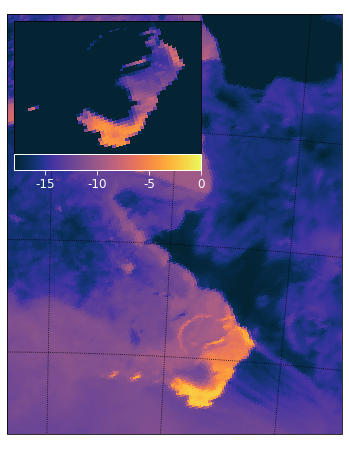

In [5]:
llcrnrlat=-75.3;urcrnrlat=-73.5;llcrnrlon=-104.7;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(6,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels= False


data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-40,vmax=0,zorder=1)#vmin=-5.0,vmax=-2.5,

# inset
axins = inset_axes(ax, width="50%", height="50%", loc='upper left', 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.SouthPolarStereo(central_longitude=-105.0)))

ip = InsetPosition(ax,[0.02, 0.535, 0.56, 0.56])
axins.set_axes_locator(ip)

llcrnrlat=-75.22;urcrnrlat=-74.8;llcrnrlon=-102.7;urcrnrlon=-100.3 # zoom into polynyas/warm T signal
axins.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
zoom = axins.pcolormesh(lon,lat,B31, transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-18,vmax=0,zorder=2)

cax = inset_axes(axins,
                 width="100%",  # width = 10% of parent_bbox width
                 height="12%",  # height : 50%
                 loc='upper left',
                 bbox_to_anchor=(0.0005, -1, 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )

cb3 = plt.colorbar(zoom,cax=cax,ticks=[-15,-10,-5,0],orientation='horizontal')#,shrink=0.9,fraction=0.045,pad=0.9)
#cb3.ax.set_xticklabels(['-14','-12','-10','-8','-6','-4','-2','0'],color ='w')
cb3.ax.set_xticklabels(['-15','-10','-5','0'],color ='w')
cb3.outline.set_edgecolor('w')
cb3.outline.set_linewidth(1)
cb3.ax.tick_params(color='w',size=5,labelsize=12)
#cb3.set_label('MODIS temperature [C]',rotation=0,fontsize=12,labelpad=0.5,color='w')

#plt.tight_layout()

#plt.savefig('X.png', format='png', dpi=400)

## Now code to plot MODIS optical insets

### 3. Read in MODIS 10 Sept 2020

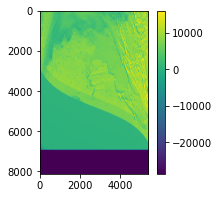

In [26]:
# Make list of all MOD09 files in folder
MODfiles = glob('../../PhD_Ch2/polynyatimeseries/20200910/MOD09.A2020254.1525.006.2020256021543.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B1 = (mod09.select('1km Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15

lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# Show entire MODIS image
fig,ax = plt.subplots(figsize=(3,3))
plt.imshow(B1)
plt.colorbar()
#plt.clim(-100,16000)  # range for this band

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

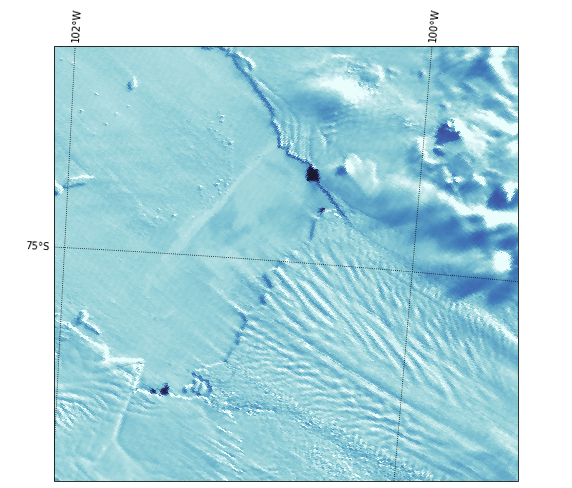

In [28]:
llcrnrlat=-75.3;urcrnrlat=-74.7;llcrnrlon=-102;urcrnrlon=-99.5 # zoom

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

#plt.tight_layout()
#plt.savefig('polynyas_20200910.jpg', format='jpg', dpi=400)

### 4. Read in MODIS 12 Sept 2019

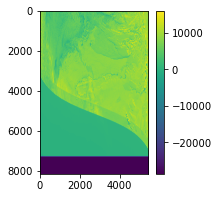

In [29]:
# Make list of all MOD09 files in folder
MODfiles = glob('../../PhD_Ch2/polynyatimeseries/20190912/MOD09.A2019255.1500.006.2019260181407.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B1 = (mod09.select('1km Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15

lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# Show entire MODIS image
fig,ax = plt.subplots(figsize=(3,3))
plt.imshow(B1)
plt.colorbar()
#plt.clim(-100,16000)  # range for this band

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

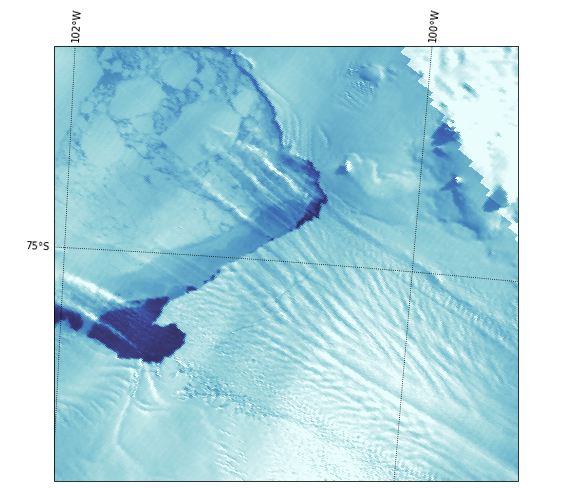

In [30]:
llcrnrlat=-75.3;urcrnrlat=-74.7;llcrnrlon=-102;urcrnrlon=-99.5 # zoom

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

#plt.tight_layout()
#plt.savefig('polynyas_20200910.jpg', format='jpg', dpi=400)

### 5. I save all panels and format for submission in illustrator or powerpoint :)

Screenshot of Fig. 2 from Savidge et al., 2023:

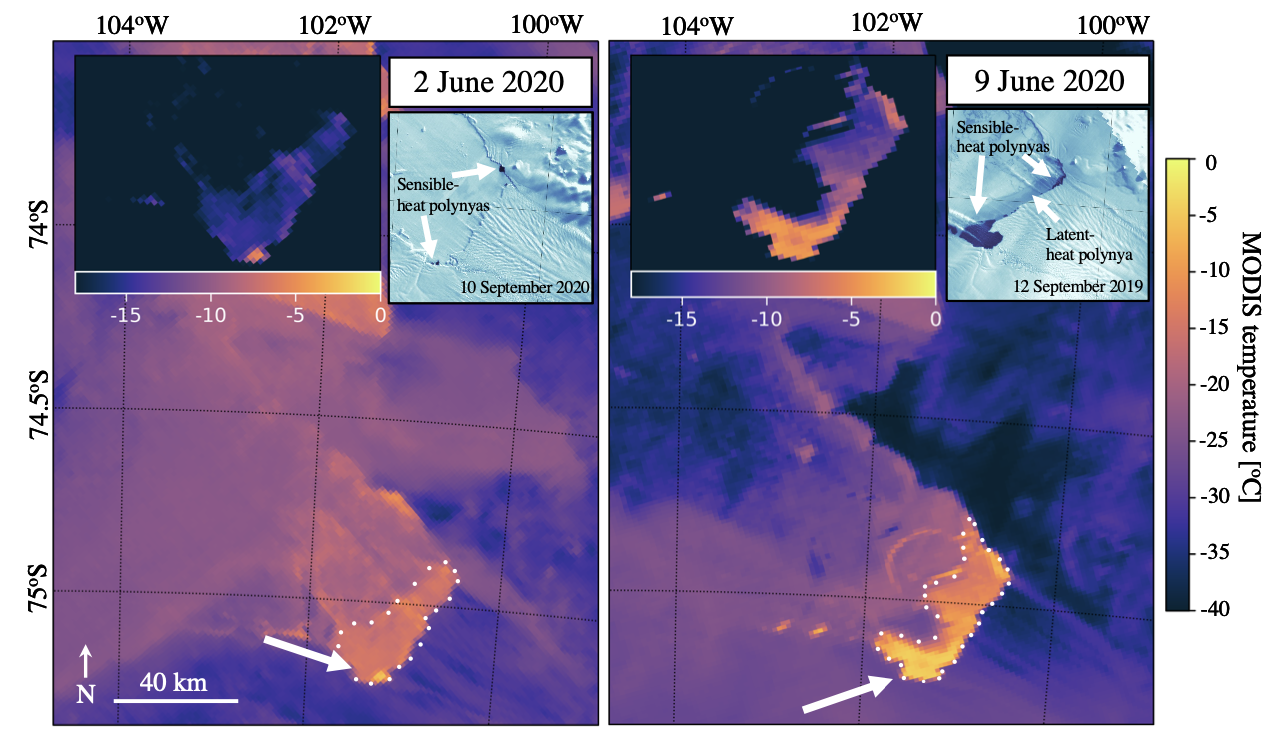

### ~ ES